In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from chembl_webresource_client.new_client import new_client

In [4]:
target = new_client.target
target_query = target.search('aromatase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,20.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,20.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116


In [5]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL1978'

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [7]:
df = pd.DataFrame.from_dict(res)

In [8]:
df.head(2)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0


In [9]:
df.to_csv('Aromatse_Bioactivity.csv')

In [10]:
df.isnull().sum()

activity_comment             2799
activity_id                     0
activity_properties             0
assay_chembl_id                 0
assay_description               0
assay_type                      0
assay_variant_accession      2893
assay_variant_mutation       2893
bao_endpoint                    0
bao_format                      0
bao_label                       0
canonical_smiles                0
data_validity_comment        2749
data_validity_description    2749
document_chembl_id              0
document_journal               25
document_year                   7
ligand_efficiency             491
molecule_chembl_id              0
molecule_pref_name           2571
parent_molecule_chembl_id       0
pchembl_value                 459
potential_duplicate             0
qudt_units                     77
record_id                       0
relation                       76
src_id                          0
standard_flag                   0
standard_relation              76
standard_text_

In [11]:
df2 = df[df.standard_value.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,None,19480249,[],CHEMBL4480339,Inhibition of recombinant human aromatase usin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,8.662
2889,None,20638467,[],CHEMBL4612451,Inhibition of human aromatase using ASD as sub...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.01
2890,None,20638468,[],CHEMBL4612452,Inhibition of recombinant human aromatase prei...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,5.55
2891,None,20638469,[],CHEMBL4612452,Inhibition of recombinant human aromatase prei...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,2.85


In [12]:
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,None,19480249,[],CHEMBL4480339,Inhibition of recombinant human aromatase usin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,8.662
2889,None,20638467,[],CHEMBL4612451,Inhibition of human aromatase using ASD as sub...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.01
2890,None,20638468,[],CHEMBL4612452,Inhibition of recombinant human aromatase prei...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,5.55
2891,None,20638469,[],CHEMBL4612452,Inhibition of recombinant human aromatase prei...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,2.85


In [13]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")

In [14]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0
...,...,...,...
2888,CHEMBL1444,N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1,2.178
2889,CHEMBL1444,N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1,10.0
2890,CHEMBL4634777,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,5550.0
2891,CHEMBL4639677,CCC#CCOc1cc(Cn2ccnc2)c2c(=O)c3ccccc3oc2c1,2850.0


In [15]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,inactive
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,active
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2888,CHEMBL1444,N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1,2.178,NaN
2889,CHEMBL1444,N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1,10.0,NaN
2890,CHEMBL4634777,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,5550.0,NaN
2891,CHEMBL4639677,CCC#CCOc1cc(Cn2ccnc2)c2c(=O)c3ccccc3oc2c1,2850.0,NaN


In [16]:
df4['bioactivity_class'].dropna()

0       inactive
1         active
2         active
3         active
4         active
          ...   
2015      active
2016      active
2017      active
2018      active
2019      active
Name: bioactivity_class, Length: 2020, dtype: object

In [17]:
df4 = df4.dropna()

In [18]:
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,inactive
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,active
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2015,CHEMBL2165315,COc1cc2c(cc1-c1cccnc1)CCC(=O)N2C,49.0,active
2016,CHEMBL2165314,COc1cc2c(cc1-c1cccnc1)CCC(=O)N2,447.0,active
2017,CHEMBL446083,CN1C(=O)CCc2cc(-c3cccnc3)ccc21,426.0,active
2018,CHEMBL2165313,O=C1CCc2cc(-c3cccnc3)c(O)cc2N1,3073.0,active


In [19]:
df4.to_csv('Aromatase_Bioactivity_Preprocessed.csv')

In [20]:
df4 = pd.read_csv('Aromatase_Bioactivity_Preprocessed.csv')

In [21]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [22]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [23]:
df_lipinski = lipinski(df4.canonical_smiles)

In [24]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
1947,268.316,2.66620,0.0,3.0
1948,254.289,2.64190,1.0,3.0
1949,238.290,2.65760,0.0,2.0
1950,240.262,2.33890,2.0,3.0


In [25]:
df_combined = pd.concat([df4,df_lipinski], axis=1)

In [26]:
df_combined.drop('Unnamed: 0',axis=1)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,inactive,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,active,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
1947,CHEMBL2165315,COc1cc2c(cc1-c1cccnc1)CCC(=O)N2C,49.0,active,268.316,2.66620,0.0,3.0
1948,CHEMBL2165314,COc1cc2c(cc1-c1cccnc1)CCC(=O)N2,447.0,active,254.289,2.64190,1.0,3.0
1949,CHEMBL446083,CN1C(=O)CCc2cc(-c3cccnc3)ccc21,426.0,active,238.290,2.65760,0.0,2.0
1950,CHEMBL2165313,O=C1CCc2cc(-c3cccnc3)c(O)cc2N1,3073.0,active,240.262,2.33890,2.0,3.0


In [27]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [28]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [29]:
df_norm = norm_value(df_combined)
df_norm

C:\Users\Administrator\anaconda3\envs\DataScience\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,inactive,329.528,4.28820,2.0,2.0,7100.0
1,1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,active,315.501,3.89810,2.0,2.0,50000.0
2,2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,238.0
3,3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,57.0
4,4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,54.0
...,...,...,...,...,...,...,...,...,...
1947,2015,CHEMBL2165315,COc1cc2c(cc1-c1cccnc1)CCC(=O)N2C,active,268.316,2.66620,0.0,3.0,49.0
1948,2016,CHEMBL2165314,COc1cc2c(cc1-c1cccnc1)CCC(=O)N2,active,254.289,2.64190,1.0,3.0,447.0
1949,2017,CHEMBL446083,CN1C(=O)CCc2cc(-c3cccnc3)ccc21,active,238.290,2.65760,0.0,2.0,426.0
1950,2018,CHEMBL2165313,O=C1CCc2cc(-c3cccnc3)c(O)cc2N1,active,240.262,2.33890,2.0,3.0,3073.0


In [30]:
df_final = pIC50(df_norm)
df_final

C:\Users\Administrator\anaconda3\envs\DataScience\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,inactive,329.528,4.28820,2.0,2.0,5.148742
1,1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,active,315.501,3.89810,2.0,2.0,4.301030
2,2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...,...
1947,2015,CHEMBL2165315,COc1cc2c(cc1-c1cccnc1)CCC(=O)N2C,active,268.316,2.66620,0.0,3.0,7.309804
1948,2016,CHEMBL2165314,COc1cc2c(cc1-c1cccnc1)CCC(=O)N2,active,254.289,2.64190,1.0,3.0,6.349692
1949,2017,CHEMBL446083,CN1C(=O)CCc2cc(-c3cccnc3)ccc21,active,238.290,2.65760,0.0,2.0,6.370590
1950,2018,CHEMBL2165313,O=C1CCc2cc(-c3cccnc3)c(O)cc2N1,active,240.262,2.33890,2.0,3.0,5.512437


In [31]:
df_final.pIC50.describe()

count    1952.000000
mean        5.973412
std         1.439958
min         1.000000
25%         5.048939
50%         5.924468
75%         6.907522
max        10.823909
Name: pIC50, dtype: float64

In [32]:
df_final.to_csv('Aromatase_df_final.csv')

In [60]:
sns.set(style='ticks')

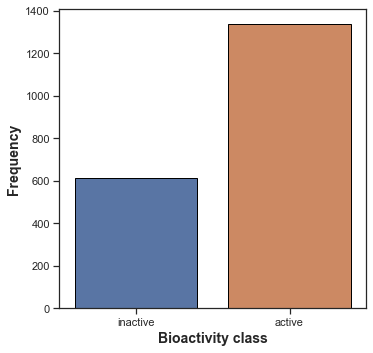

In [61]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

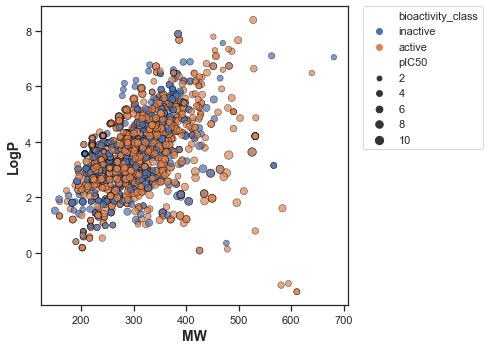

In [62]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

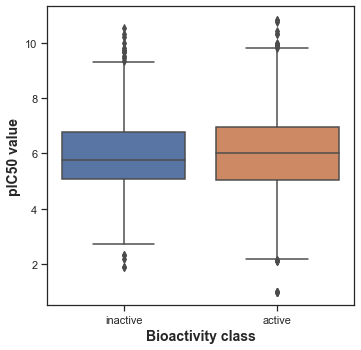

In [63]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [67]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_final[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_final[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [68]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,427355.0,0.142477,0.05,Same distribution (fail to reject H0)


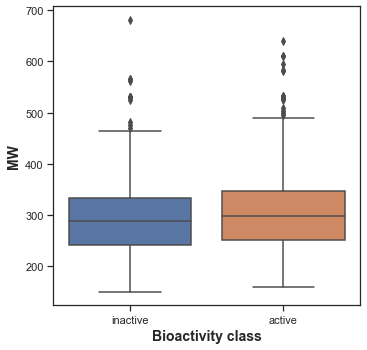

In [69]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('Aromatase_plot_MW.pdf')

In [70]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,442812.0,0.005047,0.05,Different distribution (reject H0)


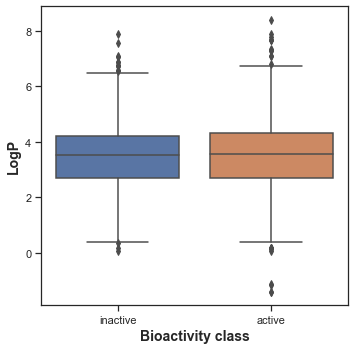

In [71]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('Aromatase_plot_LogP.pdf')

In [72]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,416061.5,0.624492,0.05,Same distribution (fail to reject H0)


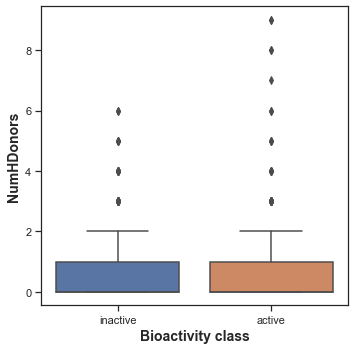

In [73]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('Aromatase_plot_NumHDonors.pdf')

In [74]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,399245.0,0.257329,0.05,Same distribution (fail to reject H0)


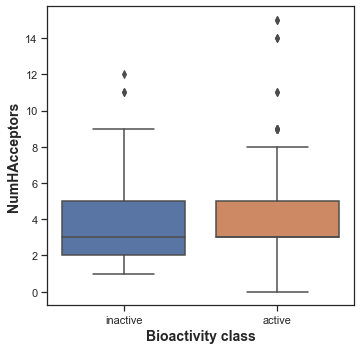

In [75]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('Aromatase_plot_NumHAcceptors.pdf')

In [76]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,425358.5,0.185468,0.05,Same distribution (fail to reject H0)
